# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [ ]:
# define procedure here
def check_input(test):
    n = len(test)
    for i in range(0, n):
      for j in range(0, n):
        row = test[i]
        col = [x[j] for x in test]
        if((test[i][j] not in col[i+1:]) and (test[i][j] not in col[:i])and (test[i][j] not in row[j+1:]) and (test[i][j] not in row[:j]) and (test[i][j] in range(1, n+1))):
            continue
        else:
            return False
    return True

In [ ]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'15Mi7J35JQ3kqZTSb5EVKbK4-6G5wEpwJ'})
downloaded.GetContentFile('StudentMarkSheet.csv')
import pandas as pd
data = pd.read_csv("StudentMarkSheet.csv")
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [ ]:
length_df = len(df)
print("Number of rows ",length_df)
na = df.isna().sum()
print("Number of rows containing null data ", na)
df = df.dropna()
currlength_df = len(df)
print("Current number of rows ",currlength_df)

Number of rows  200
Number of rows containing null data  Student name    0
Exam name       1
Exam date       0
Marks           3
dtype: int64
Current number of rows  196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [ ]:
df1 = df.loc[df["Student name"] == "James Walker"]
print(df1[["Exam name", "Marks"]])

       Exam name  Marks
0        Biology   31.0
42     Chemistry   61.0
71   Mathematics   23.0
150      Physics  100.0
180    Sociology   73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [ ]:
df2 = df["Exam name"]
df2.value_counts()
bio = df.loc[df["Exam name"] == "Biology"]
bio_mean = bio["Marks"].mean()
print("Average marks for Biology: ",bio_mean)
socio = df.loc[df["Exam name"] == "Sociology"]
socio_mean = socio["Marks"].mean()
print("Average marks for Sociology: ",socio_mean)
philoso = df.loc[df["Exam name"] == "Philosophy"]
philoso_mean = philoso["Marks"].mean()
print("Average marks for Philosophy: ",philoso_mean)
maths = df.loc[df["Exam name"] == "Mathematics"]
maths_mean = maths["Marks"].mean()
print("Average marks for Mathematics: ",maths_mean)
chem = df.loc[df["Exam name"] == "Chemistry"]
chem_mean = chem["Marks"].mean()
print("Average marks for Chemistry: ",chem_mean)
phy = df.loc[df["Exam name"] == "Physics"]
phy_mean = phy["Marks"].mean()
print("Average marks for Physics: ",phy_mean)

Average marks for Biology:  47.89473684210526
Average marks for Sociology:  56.026315789473685
Average marks for Philosophy:  47.270270270270274
Average marks for Mathematics:  48.97222222222222
Average marks for Chemistry:  50.57692307692308
Average marks for Physics:  51.76190476190476


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

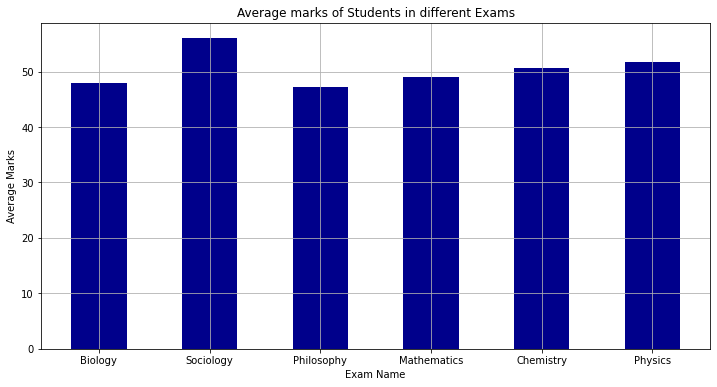

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Avg_Data = {"Biology":bio_mean, "Sociology":socio_mean, "Philosophy":philoso_mean, "Mathematics":maths_mean, "Chemistry":chem_mean, "Physics":phy_mean}
subject_name = list(Avg_Data.keys())
average = list(Avg_Data.values())
fig = plt.figure(figsize = (12, 6))
plt.bar(subject_name, average, color = "darkblue", width = 0.5)
plt.title("Average marks of Students in different Exams")
plt.xlabel("Exam Name")
plt.ylabel("Average Marks")
plt.grid()
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1d_3c7iD2wF59yXPTB5pWNFSjdYi5mSGG'})
downloaded.GetContentFile('CatData.csv')
import pandas as pd
data = pd.read_csv("CatData.csv")
data.info()
#As data doesn't contain any null value so we don't need to use any function to remove null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tail Length (cm)  342 non-null    float64
 1   Mass (kg)         342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


**Part B** - Identify the independant and dependant variables (comment answer below)

In [ ]:
# dependant variable: Mass (kg)
# independant variable: Tail Length (cm)

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [ ]:
from sklearn import linear_model
import numpy as np
num = int(len(data)*0.8)
train = data[ :num]
test = data[num: ]
regr = linear_model.LinearRegression()
train_x = np.array(train[["Tail Length (cm)"]])
train_y = np.array(train[["Mass (kg)"]])
regr.fit(train_x, train_y)
coefficients = regr.coef_
intercept = regr.intercept_

**Part D** - Print the values for slope and y-intercept

In [ ]:
print("Slope: ",coefficients)
print("Intercept: ",intercept)

Slope:  [[0.48913766]]
Intercept:  [-5.57328662]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


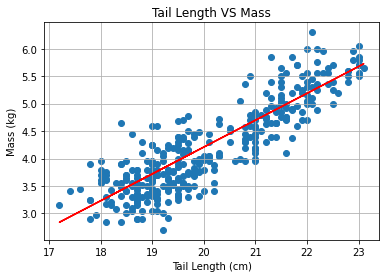

In [ ]:
import matplotlib.pyplot as plt
predicted_test = regr.predict(data[["Tail Length (cm)"]])
plt.scatter(data["Tail Length (cm)"], data["Mass (kg)"])
plt.plot(data["Tail Length (cm)"], predicted_test, color = "red")
plt.title("Tail Length VS Mass")
plt.xlabel("Tail Length (cm)")
plt.ylabel("Mass (kg)")
plt.grid()
plt.show()